# Decision Trees


Entropy - measure for randomness / impurity

we pick the node having least entropy as the root node.
less entropy/less randomness means high information gain 

Entropy (S) = (-p/p+n)*log2 (p/p+n) - (n/n+p)*log2 ((n/n+p))
p- p stand for number of positive examples

n- n stand for number of negative examples.

Step2: For Every Attribute/Features 
Average Information (AIG of a particular attribute)

I(Attribute) = Sum of {(pi+ni/p+n)*Entropy(Entropy of Attribute)}

pi- Here pi stand for number of positive examples in particular attribute.

ni- Here ni stand for number of negative examples in particular attribute.

Entropy (Attribute) - Entropy of Attribute calculated in same as we calculated for System (Whole Data-Set)

Information Gain

Gain = Entropy(S) - I (Attribute)

If all examples are positive, Return the single-node tree ,with label=+
If all examples are Negative, Return the single-node tree,with label= -
If Attribute empty, Return the single-node tree
Step4: Pick The Highest Gain Attribute
The attribute that has the most information gain has to create a group of all the its attributes and process them in same as  which we have done for the parent (Root) node.
Again, the feature which has maximum information gain will become  a node and this process will continue until we get the leaf node.
Step5: Repeat Until we get final node (Leaf node )

# Implementation of decision tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris.shape

(150, 4)

In [9]:
X = iris.values[:, :]

Y = iris_data.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [11]:
clf = DecisionTreeClassifier(random_state = 5)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [18]:
#Prediction

X = [[6.5, 1.7, 6.2, 2.1]]
y_pred = clf.predict(X)
print(y_pred)

y_pred = clf.predict(X_test)

[2]


In [20]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_test, y_pred)*100)

accuracy 97.77777777777777


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# Plot Decision tree

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

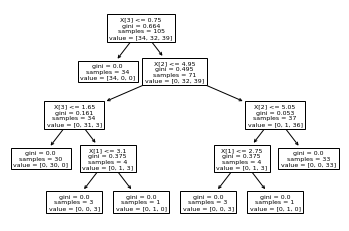

In [23]:
from sklearn import tree

tree.plot_tree(clf)

Decision tree in sklearn is implementing the CART algorithm, it uses the GINI index instead of entropy/impurity/randomness.

similar to entropy we take low GINI index to make the root node and other nodes

In [24]:
text_repre = tree.export_text(clf)

print(text_repre)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



In [25]:
# saving the tree diagram

plt.savefig('tree.eps', format = 'eps', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [26]:
tree.export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.75\\ngini = 0.664\\nsamples = 105\\nvalue = [34, 32, 39]"] ;\n1 [label="gini = 0.0\\nsamples = 34\\nvalue = [34, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[2] <= 4.95\\ngini = 0.495\\nsamples = 71\\nvalue = [0, 32, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[3] <= 1.65\\ngini = 0.161\\nsamples = 34\\nvalue = [0, 31, 3]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 30\\nvalue = [0, 30, 0]"] ;\n3 -> 4 ;\n5 [label="X[1] <= 3.1\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n5 -> 7 ;\n8 [label="X[2] <= 5.05\\ngini = 0.053\\nsamples = 37\\nvalue = [0, 1, 36]"] ;\n2 -> 8 ;\n9 [label="X[1] <= 2.75\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3\\nvalue = [0